# Import the package

In [1]:
from datetime import datetime
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
from numpy import mean
from numpy import std
from numpy import sort
import pandas as pd
from pandas.core.frame import DataFrame
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import f1_score  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score, plot_confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper,DeltaYStopper
from skopt.space import Real,Categorical,Integer
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import joblib

# Datasets

In [2]:
HDData=pd.read_csv('heart disease.csv')


In [3]:
HDData1=HDData.copy()

In [4]:
HDData1['type']=np.where(HDData1["num"]==0,'Normal','Abnormal')  
HDData1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,type
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Normal
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Abnormal
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Abnormal
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Normal
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Normal


<AxesSubplot:xlabel='type', ylabel='count'>

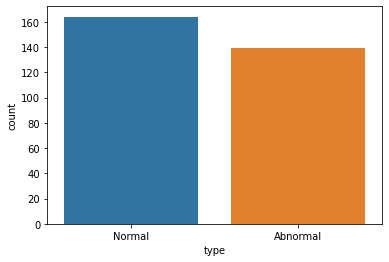

In [5]:
sns.countplot(x='type',data=HDData1)

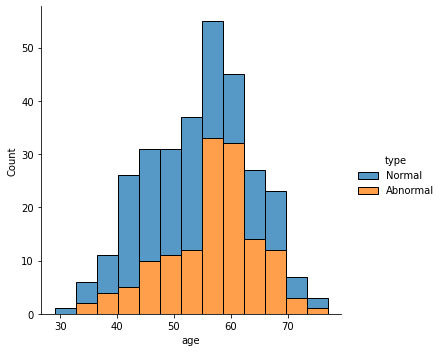

In [6]:
sns.displot(HDData1, x="age", hue="type", multiple="stack")


In [7]:
HDData2=HDData.copy()
x=HDData2.iloc[:,-2:-1]
enc=OneHotEncoder(categories='auto').fit(x)
HDresult=enc.transform(x).toarray()

HDresult

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [8]:
HDresult.shape

(303, 4)

In [9]:
ndHD=pd.concat([HDData2,pd.DataFrame(HDresult)],axis=1)
ndHD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,0,1,2,3
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0.0,1.0,0.0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1.0,0.0,0.0,0.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0.0,0.0,1.0,0.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,1.0,0.0,0.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,1.0,0.0,0.0,0.0


In [10]:
ndHD.columns

Index([     'age',      'sex',       'cp', 'trestbps',     'chol',      'fbs',
        'restecg',  'thalach',    'exang',  'oldpeak',    'slope',       'ca',
           'thal',      'num',          0,          1,          2,          3],
      dtype='object')

In [11]:
ndHD.drop(['num'],axis=1,inplace=True)


In [12]:
ndHD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,0,1,2,3
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0.0,1.0,0.0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1.0,0.0,0.0,0.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,0.0,0.0,1.0,0.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,1.0,0.0,0.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,1.0,0.0,0.0,0.0


In [13]:
ndHD.columns= [  'Age',      'Sex',       'Chest pain', 'Blood pressure',     'Cholesterol',      'Blood sugar',
        'ECG',  'Max heart rate',    'Angina induced',  'ST depression induced',    'Slope OF THE PEAK ST',       'ca',
           'Diagnosis',          '0',          '1',          '2',          '3']

In [14]:
ndHD.head()

,Age,Sex,Chest pain,Blood pressure,Cholesterol,Blood sugar,ECG,Max heart rate,Angina induced,ST depression induced,Slope OF THE PEAK ST,ca,Diagnosis,0,1,2,3
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0.0,1.0,0.0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1.0,0.0,0.0,0.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,0.0,0.0,1.0,0.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,1.0,0.0,0.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,1.0,0.0,0.0,0.0


In [15]:
pdcorrHD=ndHD.corr()
pdcorrHD

,Age,Sex,Chest pain,Blood pressure,Cholesterol,Blood sugar,ECG,Max heart rate,Angina induced,ST depression induced,Slope OF THE PEAK ST,0,1,2,3
Age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,-0.129234,0.062042,0.104902,-0.017515
Sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,-0.381754,0.142524,0.326284,-0.031427
Chest pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,-0.264936,0.045860,0.243738,0.029048
Blood pressure,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,-0.136807,0.075157,0.106210,-0.017118
Cholesterol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.002944,-0.095743,0.053100,-0.057863
Blood sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,-0.086774,0.091351,0.030953,0.080568
ECG,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,-0.029082,0.044672,0.007905,0.000812
Max heart rate,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,0.293614,-0.159523,-0.214326,-0.050354
Angina induced,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,-0.328539,0.063073,0.300223,0.030113
ST depression induced,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,-0.339086,0.104635,0.302145,-0.037946


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


<AxesSubplot:>

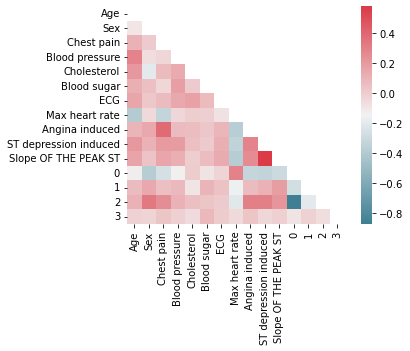

In [16]:
mask = np.zeros_like(pdcorrHD)
print(mask)
mask[np.triu_indices_from(mask)] = True
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(pdcorrHD,mask=mask,cmap=cmap,square=True,fmt='0.2f')

In [17]:
HDData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [18]:
HDData.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [19]:
HDDLoss=HDData.replace('?', np.nan)

In [20]:
def missing_count(df):
    nan_count=df.isnull().sum()
    nan_count=nan_count[nan_count>0].sort_values()
    return nan_count
print(missing_count(HDDLoss))  
mcarrLoss=missing_count(HDDLoss)

thal    2
ca      4
dtype: int64


In [21]:
HDDFilled=HDDLoss.fillna(method='ffill')

In [22]:
HDDFilled.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,1,3,0


In [23]:
HDDFilled=HDDLoss.fillna(method='bfill')

In [24]:
HDDFilled.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3,0


In [25]:
HDDFilled.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3,0


In [26]:
print(missing_count(HDDFilled))  

ca    1
dtype: int64


In [27]:
HDDFilled =HDDFilled.replace( np.nan, '1')

In [28]:
HDDFilled.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,1,3,0


In [29]:
print(missing_count(HDDFilled))  

Series([], dtype: int64)


In [30]:
HDData3=HDDFilled.copy()
# X1=HDData3.drop(labels=['num'],axis=1)

# y1=HDData3['num'].values

In [31]:
HDData1['label']=np.where(HDData3["num"]==0,'0','1')  
HDData1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,type,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Normal,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Abnormal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Abnormal,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Normal,0


In [32]:
HDData3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [33]:
HDData3['label']=np.where(HDDFilled["num"]==0,'0','1')  

In [34]:
HDData3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0


In [35]:
HDFilled1=HDData3.drop(labels=['num'],axis=1)

In [36]:
HDFilled1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [37]:
HDFilled1.to_csv('Filled Binary HD.csv',index=False)

In [38]:
HDbi=pd.read_csv('Filled Binary HD.csv')
HDbi.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
